In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import yaml
import plotly
import pandas as pd
import skimage.io as skio
from banditopt.analysis import slice_plot_data, plot_1dregression, plot_ndregression
from banditopt.algorithms import sklearn_BayesRidge

%matplotlib inline

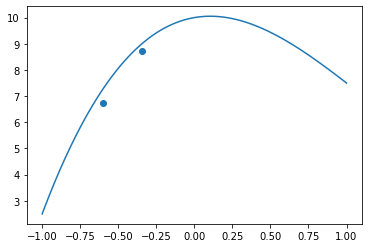

In [15]:
def poly_1d(X, a=200, b=6): 
    return 10 + X - 10/2*X**2 + 1.5*X**3


def sample_poly_1d(X, noise_scale=1):
    return poly_1d(X) + np.random.normal(0, noise_scale, poly_1d(X).shape)

grids = np.meshgrid(*[np.linspace(-1, 1, 100) for i in range(1)])
X_pred = np.hstack([grid.ravel()[:,np.newaxis] for grid in grids])


plt.plot(X_pred, poly_1d(X_pred))
n_points = 2

np.random.seed(91)

X_train = np.array([np.random.uniform(-1,1) for i in range(n_points)])[:,np.newaxis]
y_train = sample_poly_1d(X_train)
plt.scatter(X_train, y_train)
plt.show()



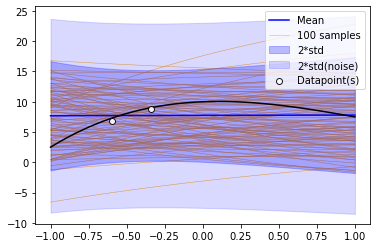

In [16]:

degree = 3
reg = sklearn_BayesRidge(degree=degree, param_space_bounds=[(-1,1)], N0_w=1, std0_w=8, N0_n=1, std0_n=10)
reg.update(X_train, y_train)

X_grid = np.linspace(-1, 1, 100)[:,np.newaxis]
mean, std, std_noise = reg.get_mean_std(X_grid, return_withnoise=True)
samples_list = [reg.sample(X_grid) for i in range(100)]
plot_1dregression(X_grid.flatten(), mean, std, std_noise, samples_list, X_train, y_train, legend=True)
plt.plot(X_grid, poly_1d(X_grid), c='black', label="Ground truth")


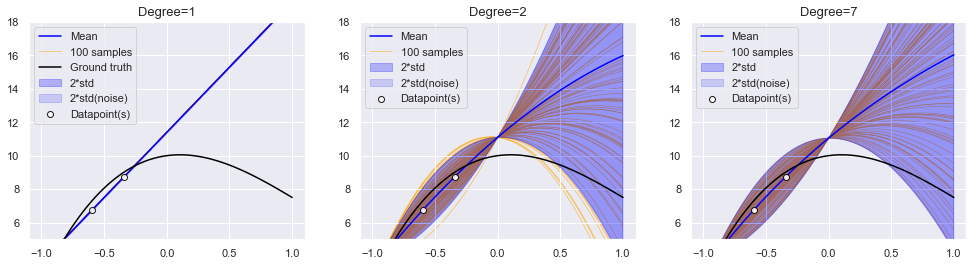

In [17]:
sns.set_theme()
scale=4
fig, axes = plt.subplots(1,3, figsize=(3*scale*1.4, 1*scale))
axes = axes.flatten()

for i_plot, degree in enumerate((1, 2, 7)):
    plt.sca(axes[i_plot])

    reg = sklearn_BayesRidge(degree=degree, param_space_bounds=[(-1,1)], fit_intercept=True)
    reg.update(X_train, y_train)
    X_grid = np.linspace(-1, 1, 100)[:,np.newaxis]
    mean, std, std_noise = reg.get_mean_std(X_grid, return_withnoise=True)
    samples_list = [reg.sample(X_grid) for i in range(100)]
    plot_1dregression(X_grid.flatten(), mean, std, std_noise, samples_list, X_train, y_train, legend=True)
    plt.plot(X_grid, poly_1d(X_grid), c='black', label="Ground truth")
    if i_plot==0:
        plt.legend()
    plt.title(f"Degree={degree}", fontsize=13)
    plt.ylim(5, 18)

plt.savefig(f'regression_1d_{n_points}points_fixed_bias.pdf', bbox_inches='tight')


plt.show()
    

    
#     reg = sklearn_BayesRidge(degree=degree, param_space_bounds=[(-1,1)])
#     reg.update(X_train, y_train)
#     X_grid = np.linspace(-1, 1, 100)[:,np.newaxis]
#     mean, std, std_noise = reg.get_mean_std(X_grid, return_withnoise=True)
#     samples_list = [reg.sample(X_grid) for i in range(100)]
#     plot_1dregression(X_grid.flatten(), mean, std, std_noise, samples_list, X_train, y_train, legend=True)
#     plt.plot(X_grid, poly_1d(X_grid), c='black', label="Ground truth")
#     plt.legend()
#     plt.title(f"Degree={degree}")
#     plt.show()






 ------- npoints=1 -----------
N0=1, std0_w=8, std0_n=1.6, lambda_1=0.5, lambda_2=32.0, alpha_1=0.5, alpha_2=1.2800000000000002


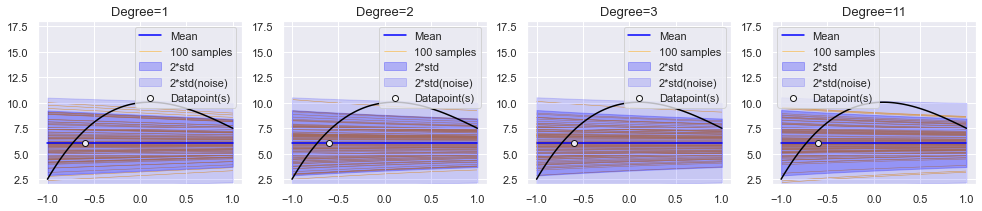

N0=1, std0_w=8, std0_n=1.6, lambda_1=1e-06, lambda_2=1e-06, alpha_1=1e-06, alpha_2=1e-06


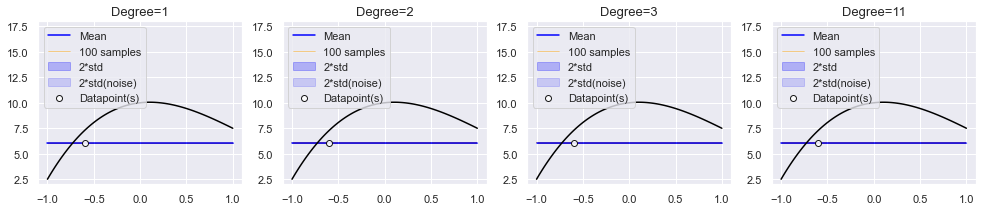

 ------- npoints=2 -----------
N0=1, std0_w=8, std0_n=1.6, lambda_1=0.5, lambda_2=32.0, alpha_1=0.5, alpha_2=1.2800000000000002


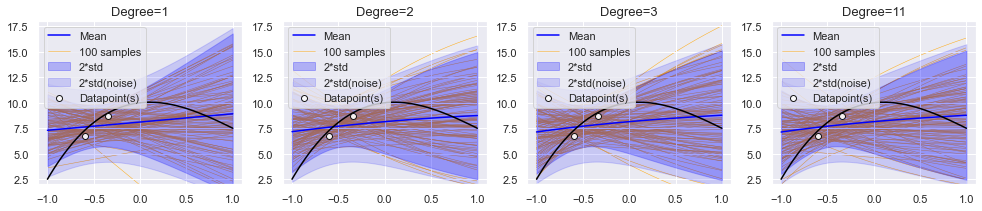

N0=1, std0_w=8, std0_n=1.6, lambda_1=1e-06, lambda_2=1e-06, alpha_1=1e-06, alpha_2=1e-06


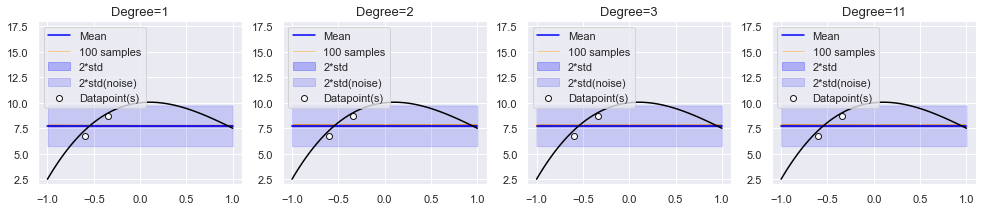

 ------- npoints=4 -----------
N0=1, std0_w=8, std0_n=1.6, lambda_1=0.5, lambda_2=32.0, alpha_1=0.5, alpha_2=1.2800000000000002


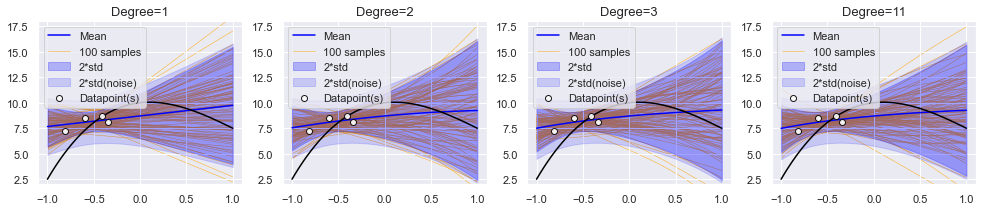

N0=1, std0_w=8, std0_n=1.6, lambda_1=1e-06, lambda_2=1e-06, alpha_1=1e-06, alpha_2=1e-06


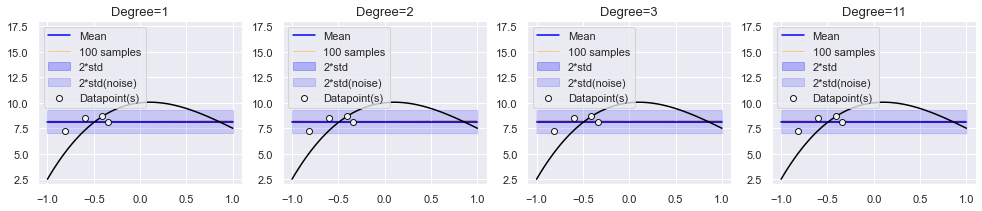

 ------- npoints=8 -----------
N0=1, std0_w=8, std0_n=1.6, lambda_1=0.5, lambda_2=32.0, alpha_1=0.5, alpha_2=1.2800000000000002


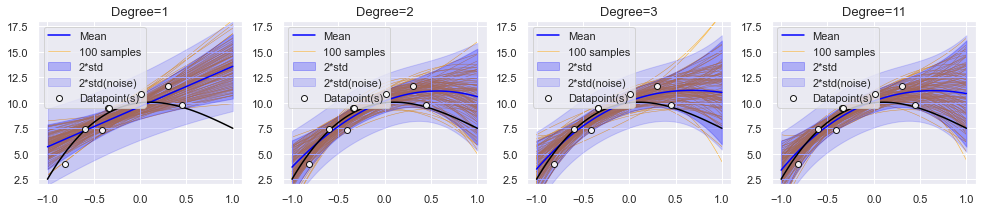

N0=1, std0_w=8, std0_n=1.6, lambda_1=1e-06, lambda_2=1e-06, alpha_1=1e-06, alpha_2=1e-06


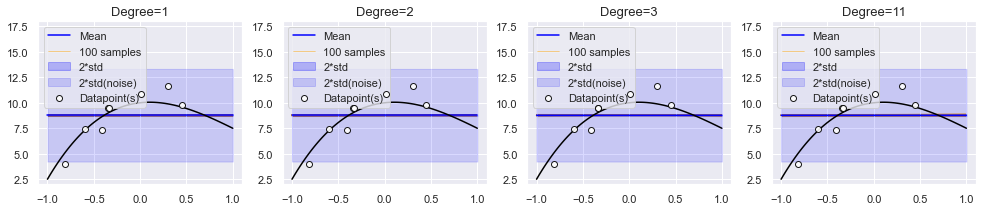

 ------- npoints=12 -----------
N0=1, std0_w=8, std0_n=1.6, lambda_1=0.5, lambda_2=32.0, alpha_1=0.5, alpha_2=1.2800000000000002


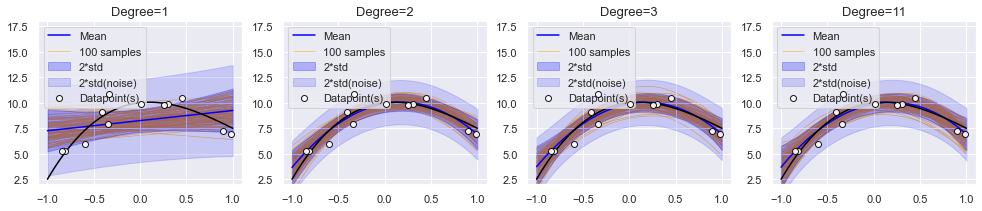

N0=1, std0_w=8, std0_n=1.6, lambda_1=1e-06, lambda_2=1e-06, alpha_1=1e-06, alpha_2=1e-06


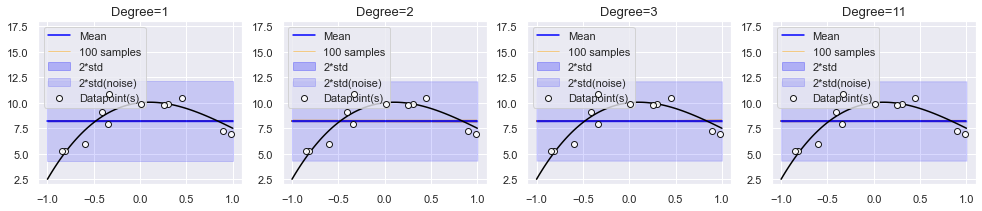

 ------- npoints=16 -----------
N0=1, std0_w=8, std0_n=1.6, lambda_1=0.5, lambda_2=32.0, alpha_1=0.5, alpha_2=1.2800000000000002


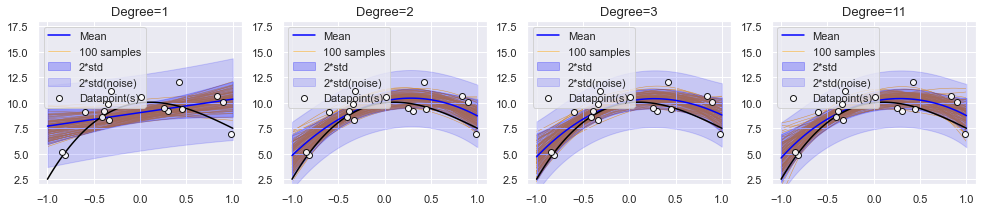

N0=1, std0_w=8, std0_n=1.6, lambda_1=1e-06, lambda_2=1e-06, alpha_1=1e-06, alpha_2=1e-06


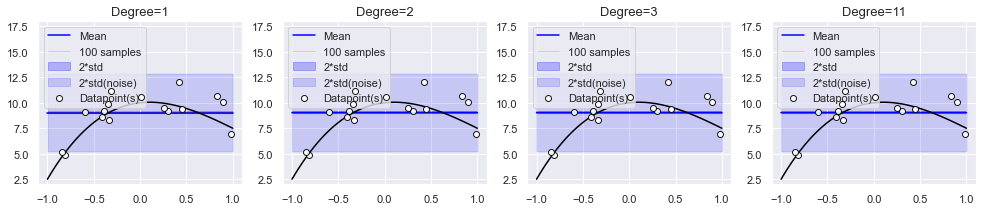

 ------- npoints=32 -----------
N0=1, std0_w=8, std0_n=1.6, lambda_1=0.5, lambda_2=32.0, alpha_1=0.5, alpha_2=1.2800000000000002


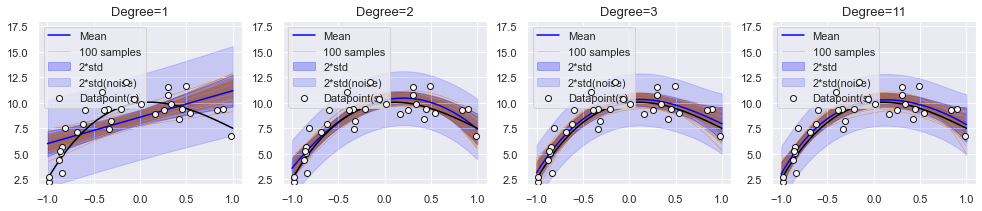

N0=1, std0_w=8, std0_n=1.6, lambda_1=1e-06, lambda_2=1e-06, alpha_1=1e-06, alpha_2=1e-06


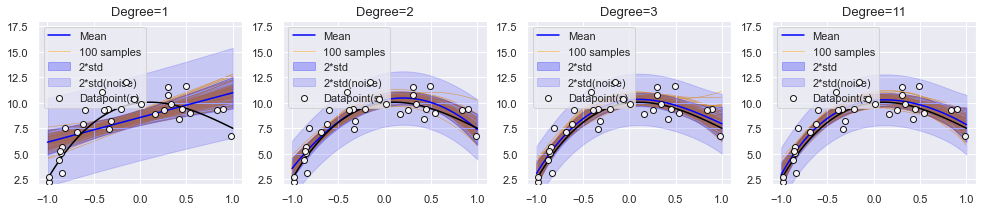

 ------- npoints=64 -----------
N0=1, std0_w=8, std0_n=1.6, lambda_1=0.5, lambda_2=32.0, alpha_1=0.5, alpha_2=1.2800000000000002


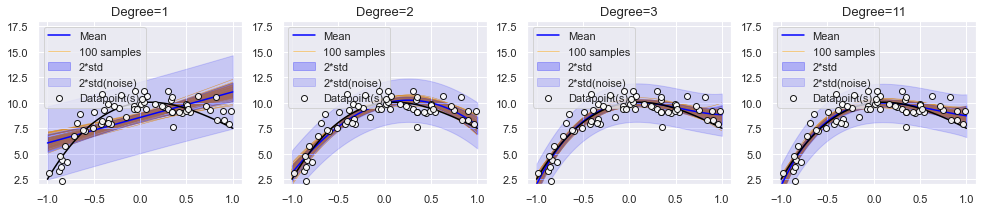

N0=1, std0_w=8, std0_n=1.6, lambda_1=1e-06, lambda_2=1e-06, alpha_1=1e-06, alpha_2=1e-06


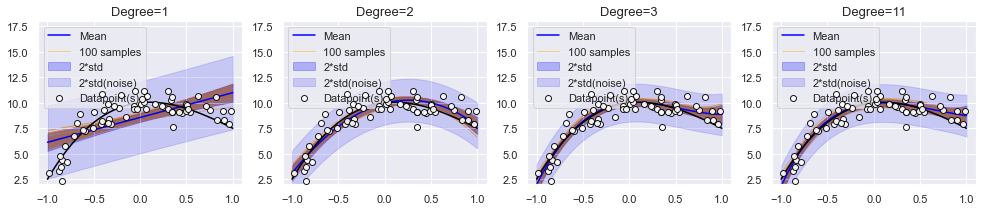

In [22]:

# def poly_1d(X, a=200, b=6): 
#     return 10 + X + 3/2*X**2 + 3*X**3


def sample_poly_1d(X, noise_scale=1):
    return poly_1d(X) + np.random.normal(0, noise_scale, poly_1d(X).shape)

grids = np.meshgrid(*[np.linspace(-1, 1, 100) for i in range(1)])
X_pred = np.hstack([grid.ravel()[:,np.newaxis] for grid in grids])






hyper_params_list = []

N0 = 1
std0_w = 8
std0_n = 1.6
lambda_1 = N0/2
lambda_2 = lambda_1*std0_w**2
alpha_1 = N0/2
alpha_2 = alpha_1*std0_n**2
hyper_params_list.append((lambda_1, lambda_2, alpha_1, alpha_2))



# N0 = 1
# std0_w = 4
# std0_n = 1.6
# lambda_1 = N0/2
# lambda_2 = lambda_1*std0_w**2
# alpha_1 = 1e-6
# alpha_2 = 1e-6
# hyper_params_list.append((lambda_1, lambda_2, alpha_1, alpha_2))


hyper_params_list.append((1e-6, 1e-6, 1e-6, 1e-6))


for n_points in (1, 2, 4, 8, 12, 16, 32, 64):
    
    print(f" ------- npoints={n_points} -----------")

    np.random.seed(91)
    X_train = np.array([np.random.uniform(-1,1) for i in range(n_points)])[:,np.newaxis]
    y_train = sample_poly_1d(X_train)




    for hyper_params in hyper_params_list:
        lambda_1, lambda_2, alpha_1, alpha_2 = hyper_params

        figscale=3
        fig, axes = plt.subplots(1,4, figsize=(4*figscale*1.4, 1*figscale))
        axes = axes.flatten()


        from sklearn.preprocessing import StandardScaler


        for i_plot, degree in enumerate((1, 2, 3, 11)):
            plt.sca(axes[i_plot])




        #     reg = sklearn_BayesRidge(degree=degree, param_space_bounds=[(-1,1)], fit_intercept=False, lambda_1 =1, lambda_2=20, alpha_1=1e-6, alpha_2=1e-6)
        #     reg = sklearn_BayesRidge(degree=degree, param_space_bounds=[(-1,1)], fit_intercept=False, lambda_1 =1, lambda_2=16, alpha_1=1, alpha_2=4)
            reg = sklearn_BayesRidge(degree=degree, param_space_bounds=[(-1,1)], lambda_1 =lambda_1, lambda_2=lambda_2, alpha_1=alpha_1, alpha_2=alpha_2)



            reg.update(X_train, y_train)
            X_grid = np.linspace(-1, 1, 100)[:,np.newaxis]
            mean, std, std_noise = reg.get_mean_std(X_grid, return_withnoise=True)
            mean = mean
            samples_list = [reg.sample(X_grid) for i in range(100)]
            plot_1dregression(X_grid.flatten(), mean, std, std_noise, samples_list, X_train, y_train, legend=True)
            plt.plot(X_grid, poly_1d(X_grid), c='black', label="Ground truth")
        #     plt.legend()
            plt.title(f"Degree={degree}")
            plt.ylim(2, 18)

            plt.title(f"Degree={degree}", fontsize=13)
        #     sns.heatmap(reg.sigma_)
    #     plt.savefig(f'regression_1d_{n_points}points_notfixed_bias.pdf', bbox_inches='tight')



        print(f"N0={N0}, std0_w={std0_w}, std0_n={std0_n}, lambda_1={lambda_1}, lambda_2={lambda_2}, alpha_1={alpha_1}, alpha_2={alpha_2}")

        plt.show()

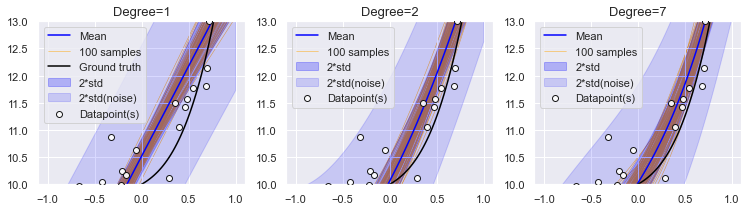

In [329]:
scale=3
fig, axes = plt.subplots(1,3, figsize=(3*scale*1.4, 1*scale))
axes = axes.flatten()


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=False)
y_train_centered = scaler.fit_transform(y_train)
    
for i_plot, degree in enumerate((1, 2, 7)):
    plt.sca(axes[i_plot])


    reg = sklearn_BayesRidge(degree=degree, param_space_bounds=[(-1,1)], fit_intercept=False, alpha_1 =1, alpha_2=0.05)
    reg.update(X_train, y_train_centered)
    X_grid = np.linspace(-1, 1, 100)[:,np.newaxis]
    mean, std, std_noise = reg.get_mean_std(X_grid, return_withnoise=True)
    mean = mean + scaler.mean_
    samples_list = [reg.sample(X_grid)+scaler.mean_ for i in range(100)]
    plot_1dregression(X_grid.flatten(), mean, std, std_noise, samples_list, X_train, y_train, legend=True)
    plt.plot(X_grid, poly_1d(X_grid), c='black', label="Ground truth")
#     plt.legend()
    plt.title(f"Degree={degree}")
    plt.ylim(10, 13)

    if i_plot==0:
        plt.legend()
    plt.title(f"Degree={degree}", fontsize=13)
#     sns.heatmap(reg.sigma_)
plt.savefig(f'regression_1d_{n_points}points_notfixed_bias_zoom.pdf', bbox_inches='tight')


plt.show()





# Choosing a gamma prior

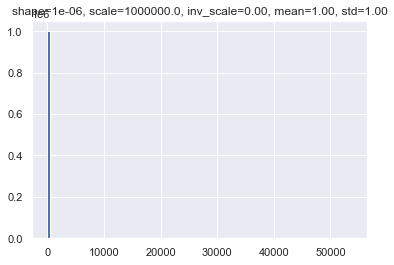

In [453]:
from scipy import stats
pdf = stats.gamma.pdf


def plot_gamma(shape=None, scale=None, inv_scale=None, mean = None):
    figscale = 1
    plt.figure(figsize=(6*figscale, 4*figscale))
    if scale==None:
        scale = 1/inv_scale
    if shape==None:
        shape = mean * inv_scale
    pdf = np.random.gamma(shape=shape, scale=scale, size=1000000)
    plt.hist(pdf, bins=100)
    plt.title(f"shape={shape}, scale={scale}, inv_scale={1/scale:.2f}, mean={shape*scale:.2f}, std={np.sqrt(shape*scale):.2f}")
#     plt.xlim(0,20)
#     print(pdf.mean(), pdf.std())
    plt.show()
    return pdf
# shape ,scale = 1, 3

# mean = 10
# inv_scale = 0.01
shape = mean * inv_scale
# plot_gamma(shape=1, inv_scale=0.1)
pdf = plot_gamma(shape=1e-6, inv_scale=1e-6)

In [24]:
from scipy.special import gamma, gammainc
def gamma_pdf(x, alpha, beta):
    # alpha=shape, beta=inverse scale
    nom = beta**alpha * x**(alpha-1) * np.exp(-beta*x)
    return nom / gamma(alpha)
def gamma_cdf(x, alpha, beta):
    # alpha=shape, beta=inverse scale
    return gammainc(alpha, beta*x)

------ Reasonnable hyperprior for the weigths prior ------
The very vague prior used up until now (shape=0.5, scale=0.03125, inv_scale=32.0):


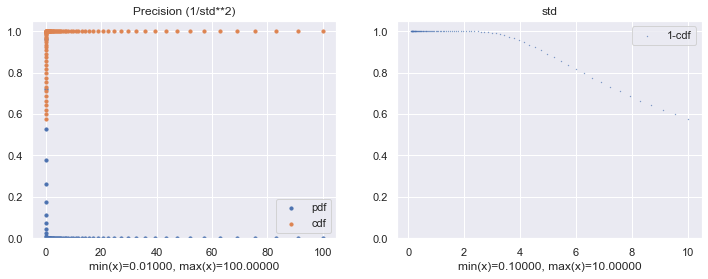

------ Reasonnable hyperprior for the noise prior ------
The very vague prior used up until now (shape=0.5, scale=0.7812499999999999, inv_scale=1.2800000000000002):


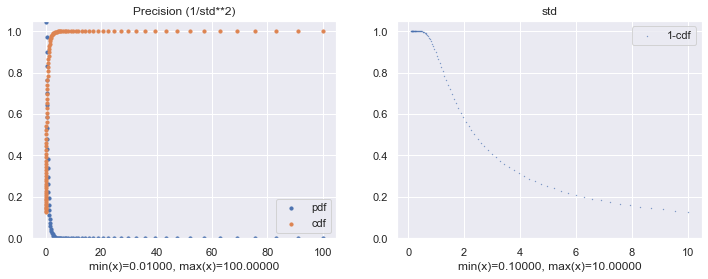

------ Reasonnable hyperprior for the noise prior ------
The very vague prior used up until now (shape=1e-06, scale=1000000.0, inv_scale=1e-06):


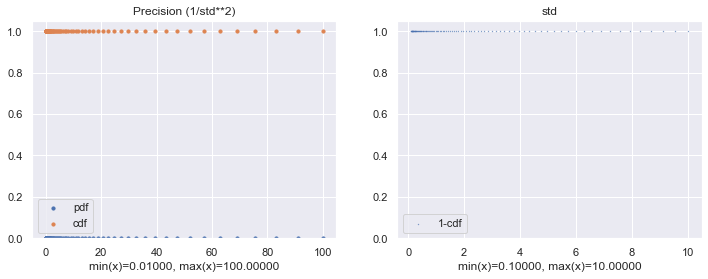

In [25]:
import scipy.stats as stats 

import time
t0 = time.time()


def plot_gamma(x, shape, scale):
    fig, axes = plt.subplots(1,2, figsize=(12, 4))
    plt.sca(axes[0])
    # pdf = stats.gamma.pdf(x, a=shape,  scale=scale)
    # cdf_0 = stats.gamma.cdf(x, a=shape,  scale=scale)
    pdf = gamma_pdf(x, alpha=shape,  beta=1/scale)
    cdf = gamma_cdf(x, alpha=shape,  beta=1/scale)
    plt.scatter(x, pdf, label="pdf", s=10)
    plt.scatter(x, cdf, label="cdf", s=10)
    
    # plt.plot(cdf_0)
    
    plt.ylim(0,1.05)

    plt.legend()
    plt.title("Precision (1/std**2)")
    plt.xlabel(f"min(x)={min(x):.5f}, max(x)={max(x):.5f}")

    
    
    plt.sca(axes[1])
    x = np.sqrt(1/x)
#     plt.scatter(x, pdf, label="pdf")
    plt.scatter(x, cdf, label="1-cdf", s=0.1)
    plt.ylim(0,1.05)
    plt.legend()
    plt.title("std")
    plt.xlabel(f"min(x)={min(x):.5f}, max(x)={max(x):.5f}")
    plt.show()

    
    
    
 
# x = np.logspace(-45,45, base=1.2)
x = np.logspace(-2,2,100, base=10)



print("------ Reasonnable hyperprior for the weigths prior ------")
N = 1
obs_std = 8
shape = N/2
scale = 1/(shape*obs_std**2)
print(f"The very vague prior used up until now (shape={shape}, scale={scale}, inv_scale={1/scale}):")
plot_gamma(x, shape, scale)

print("------ Reasonnable hyperprior for the noise prior ------")

N = 1
obs_std = 1.6
shape = N/2
scale = 1/(shape*obs_std**2)
print(f"The very vague prior used up until now (shape={shape}, scale={scale}, inv_scale={1/scale}):")
plot_gamma(x, shape, scale)


print("------ Reasonnable hyperprior for the noise prior ------")


shape = 1e-6
scale = 1/1e-6
print(f"The very vague prior used up until now (shape={shape}, scale={scale}, inv_scale={1/scale}):")
plot_gamma(x, shape, scale)

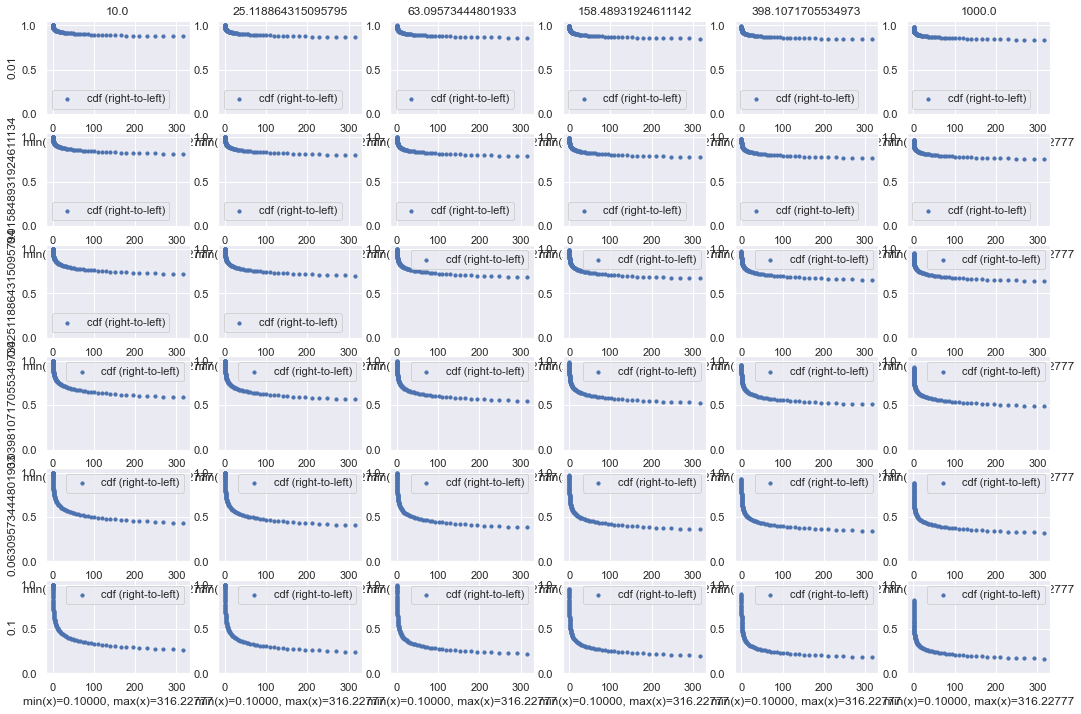

In [808]:
# shapes = 4.**np.arange(-3,4)
# scales = 4.**np.arange(-3,4)
shapes = np.logspace(-2, -1, 6)
scales = np.logspace(1, 3, 6)




nrows = len(shapes)
ncols = len(scales)
figscale = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*1.5*figscale, ncols*figscale))

for i, shape in enumerate(shapes):
    for j, scale in enumerate(scales):
        plt.sca(axes[i,j])
        if i==0:
            plt.title(scale)
        if j==0:
            plt.ylabel(shape)
        x = np.logspace(-5,2,100, base=10)
        pdf = gamma_pdf(x, alpha=shape,  beta=1/scale)
        cdf = gamma_cdf(x, alpha=shape,  beta=1/scale)
        x = np.sqrt(1/x)
        plt.scatter(x, cdf, label="cdf (right-to-left)", s=10)
        plt.ylim(0,1.05)
        plt.legend()
#         plt.title("std")
        plt.xlabel(f"min(x)={min(x):.5f}, max(x)={max(x):.5f}")
plt.show()

In [781]:
1/1000

0.001

In [766]:
np.logspace(0.01, 4, 10, base=2)

array([ 1.00695555,  1.36920013,  1.86175943,  2.53151319,  3.44220575,
        4.68051301,  6.36429187,  8.65379733, 11.76693491, 16.        ])

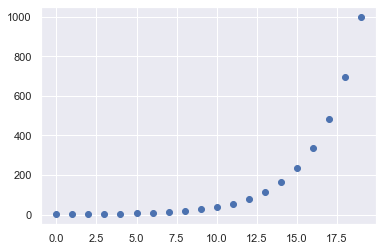

In [741]:
plt.scatter(range(len(np.logspace(0.01, 100, 20))), np.logspace(0.01, 3, 20))

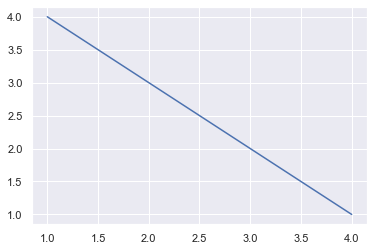

In [613]:
x = np.array([4,3,2,1])
y = np.array([1,2,3,4])
plt.plot(x,y)

In [595]:
# how to choose the prior correctly ?
# 1. Check the theory (what does the scale and shape represent, also plot a graph of mean and var vs them)
# 2. What does the precision represent? What should be a reasonnable prior on it (very vague, but not uninformative)?
# 3. Play with the graphs and add additional visualizations if necessary

#precision = 1/std**2 => std = sqrt(1/precision)


0
1
2
3
4
5
6
7
8
9


In [ ]:
# from __future__ import print_function
# from ipywidgets import interact, interactive, fixed, interact_manual
# import ipywidgets as widgets

# widg = interact(plot_gamma, 
#          shape=widgets.IntSlider(min=0, max=30, step=1, value=10), 
#          scale=widgets.IntSlider(min=0, max=30, step=1, value=10)
#         )

In [323]:
for std in (0.05, 0.1, 10):

    var = std**2
    precision= 1/std**2

    print(f"std={std:.4f}, precision={precision:.4f}, var = {var:.4f}")
    
    

std=0.0500, precision=400.0000, var = 0.0025
std=0.1000, precision=100.0000, var = 0.0100
std=10.0000, precision=0.0100, var = 100.0000


In [385]:
0.1

0.1

In [238]:
# mean = shape*scale = shape/inv_scale => shape = mean * inv_scale

1.0